In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Hands on signal filtering

Let's start by preparing a synthetic signal

Text(0, 0.5, 'y')

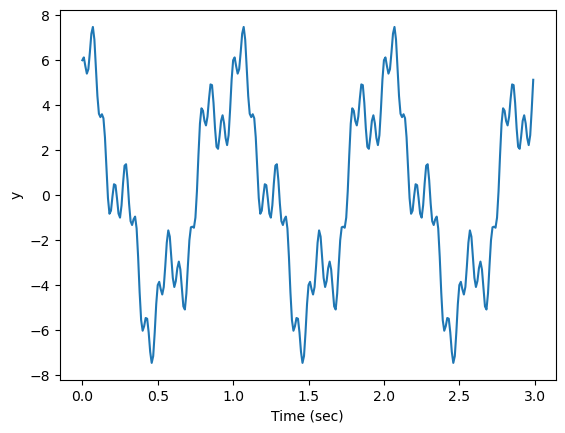

In [2]:
delta_s = 1./100; #sampling interval
f_s = 1./delta_s; #sampling frequency
f = 1.0 # Hz # sinusoidal signal frequency
T = 3.0;
time = np.arange(0.0, T, delta_s) # sampling points at f_s frequency
N=time.size; 

f = 5*np.cos(2 * np.pi * f * time) + 2* np.sin(4 * 2 * np.pi * f * time)  +  np.cos(14 * 2 * np.pi * f * time)
plt.plot(time, f)
plt.xlabel("Time (sec)")
plt.ylabel("y")

We now compute its Fourier transform (DFT), does it make sense to you?

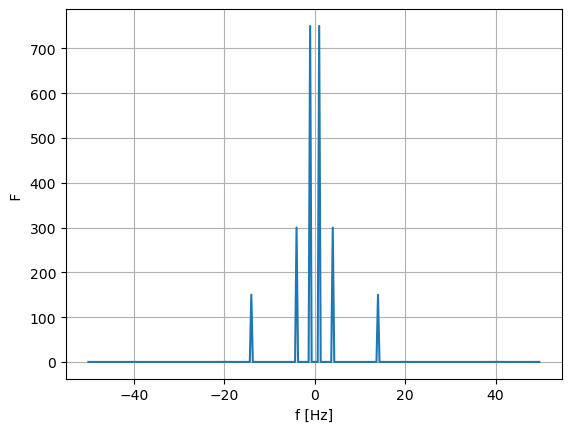

In [5]:
fft_f = np.fft.fft(f)
n = len(fft_f) #array size

freq = np.fft.fftfreq(n, 1/f_s)

#notice all the shifts (to avoid artifacts)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_f))) 
plt.xlabel('f [Hz]')
plt.ylabel(' F  ')
plt.grid()

## Filters in the frequency domain

### Thresholding

A first attempt with filtering. We start off with a filtering by thresholding (we implement what we call a <i>hard cut-off</i>)

In particular in this lab we implement a <b> low-pass filter </b>: we let low frequencies pass ("low" with respect to the threshold)

In [10]:
thresh = 10

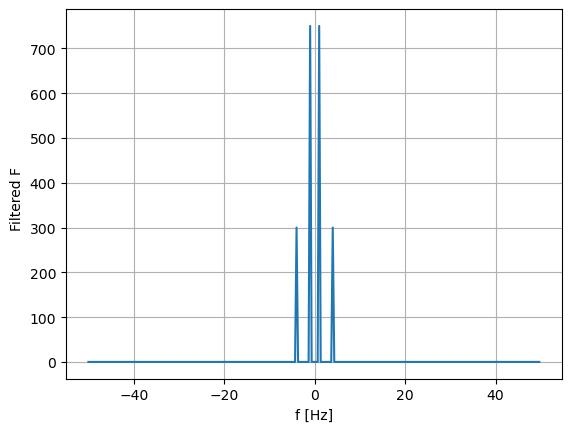

In [11]:
# find all the indices corresponding to frequencies greather than a threshold 
idx = np.argwhere(np.abs(freq)>thresh)
fft_cut=np.copy(fft_f)
fft_cut[idx]=0

#notice all the shifts (to avoid artifacts)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_cut))) 
plt.xlabel('f [Hz]')
plt.ylabel('Filtered F  ')

plt.grid()

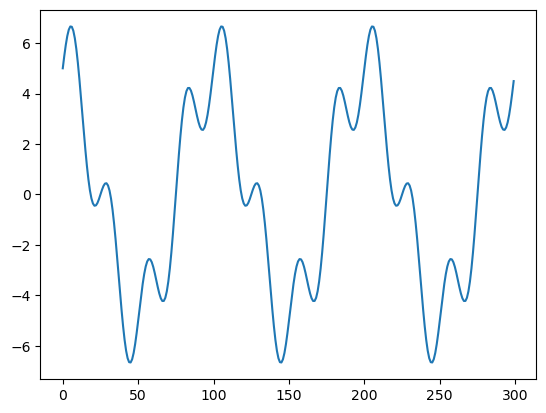

In [12]:
#let us check the resulting filtered signal (after applying the inverse of the FT)
f_cut=np.fft.ifft(fft_cut)
plt.plot(np.real(f_cut))

## Let us build an ideal low-pass filter
We now discuss how to build a filter map to be applied in the Fourier domain. We start by defining the so-called <b> "ideal" filter</b>, corresponding to what we just did before  

Text(0.5, 0, 'frequency')

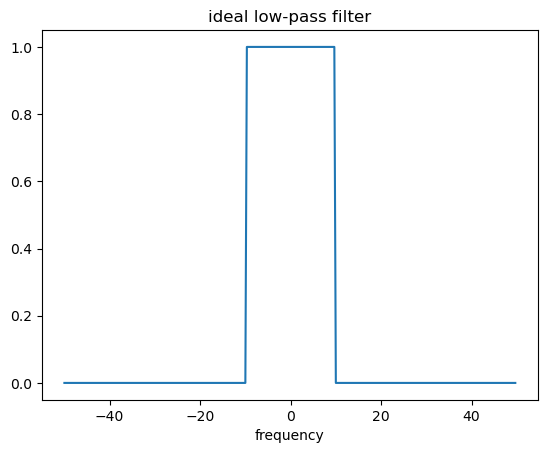

In [13]:
#let us create an ideal filter in Fourier

ideal = np.zeros(n)
ideal = np.fabs(freq)<thresh

#notice all the shifts (to avoid artifacts)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(ideal))) 
 

plt.title("ideal low-pass filter")
plt.xlabel("frequency")
#plt.ylabel("")

In [14]:
# either I shift both functions or neither (i choose the latter)
fft_filt = np.multiply(fft_f,ideal)

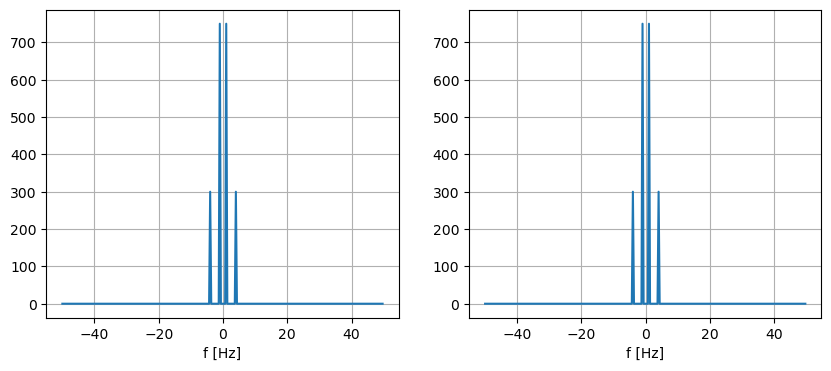

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#notice all the shifts (to avoid artifacts)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_cut))) 
plt.xlabel('f [Hz]')
plt.grid()
plt.subplot(1,2,2)
#notice all the shifts (to avoid artifacts)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_filt))) 
plt.xlabel('f [Hz]')
plt.grid()




## What if the signal is noisy?
Noise resides in high frequences, then it can be reduced by applying a low pass filter. <br>
Here we start by adding artificial noise to the signal

Text(0, 0.5, 'Noisy y')

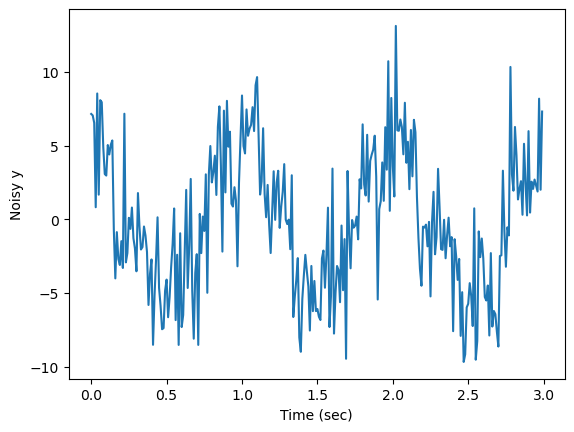

In [16]:
#and what if here is noise?
rng = np.random.default_rng()
fn = f + rng.standard_normal(len(time)) * 2.8 #play with the amount of noise
plt.plot(time, fn)
plt.xlabel("Time (sec)")
plt.ylabel("Noisy y")

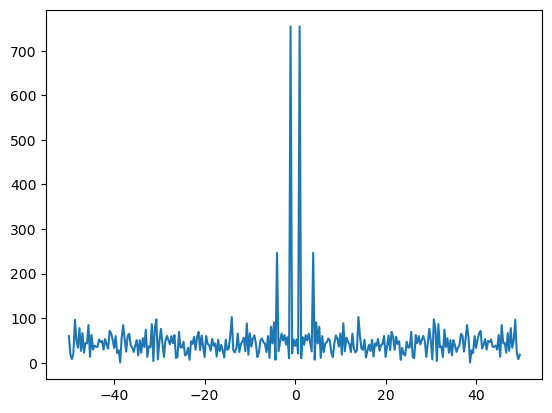

In [17]:
fft_f_n = np.fft.fft(fn)
n = len(fft_f) #array size

freq = np.fft.fftfreq(n, 1/f_s)

#notice all the shifts (to avoid artifacts)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_f_n))  )

In [18]:
# either I shift both functions or neither (i choose the latter)
fft_filt_n = np.multiply(fft_f_n,ideal)

## Signal-noise trade-off
Notice that low-pass filtering attenuates noise but also high frequencies in the signal (in our synthetic signal, the highest frequency component is lost)

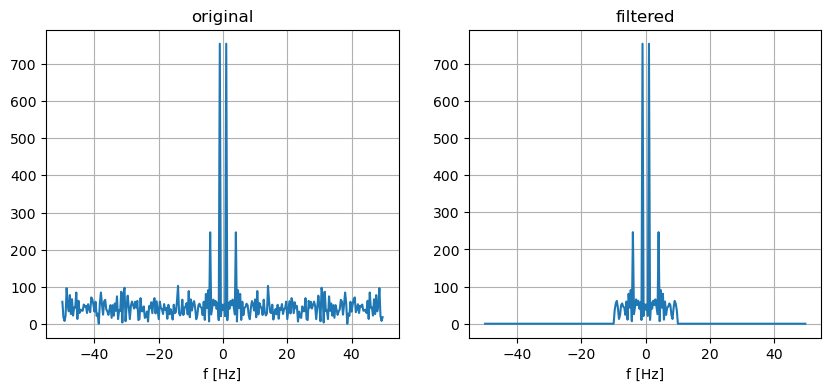

In [19]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#notice all the shifts (to avoid artifacts)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_f_n))) 
plt.xlabel('f [Hz]')
plt.title('original')
plt.grid()
plt.subplot(1,2,2)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_filt_n))) 
plt.xlabel('f [Hz]')
plt.title('filtered')
plt.grid()



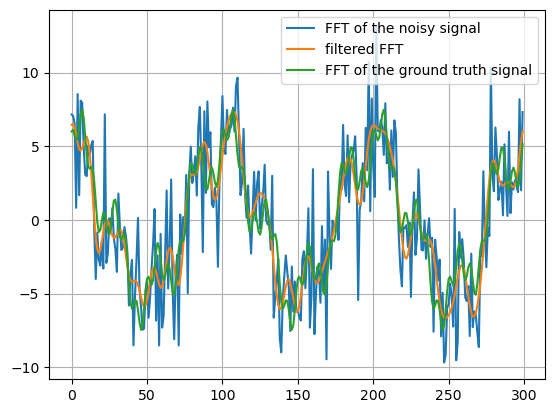

In [25]:


f2=np.fft.ifft(fft_f_n)
plt.plot(np.real(f2),label="FFT of the noisy signal")

f3=np.fft.ifft(fft_filt_n)
plt.plot(np.real(f3),label="filtered FFT")

plt.plot((f),label="FFT of the ground truth signal") #original noise-less
plt.legend(loc="upper right")
plt.grid()


### Gaussian low pass in Fourier
We now compute a gaussian low pass filter.
The role of the filter's cut is played by the sigma, but notice here <b> there isn't a hard cut </b>(can you see it in the plots?)

We first compare a Gaussian and its FT try with different <tt>sigma</tt> values

In [28]:
def gaussian(sigma,n):
    x = np.linspace(-n//2,n//2, n)
    bump = np.exp(-x**2/2.*sigma**2)
    bump /= np.trapz(bump) # normalize the integral to 1
    return x, bump

Text(0.5, 1.0, 'Gaussian')

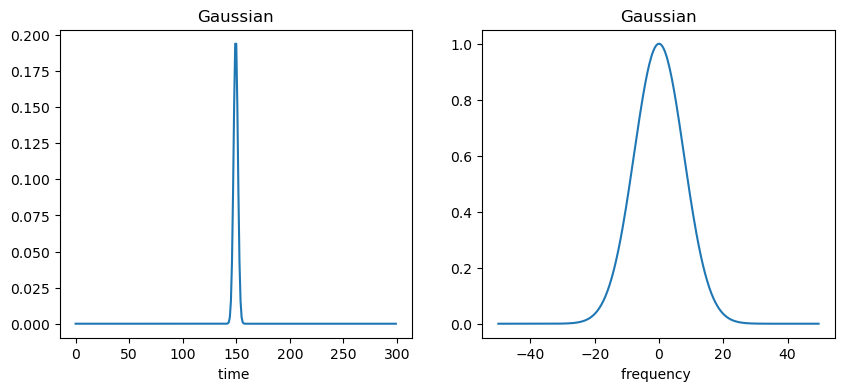

In [29]:
# define the gaussian in time
x,y = gaussian(0.5,n) 
# compute the filter in frequency
y_shifted = np.fft.fftshift(y)
fft_gauss = np.fft.fft(y_shifted)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(y) 
plt.xlabel("time ")
plt.title("Gaussian")
plt.subplot(1,2,2)
plt.plot(np.fft.ifftshift(freq),np.fft.ifftshift(fft_gauss) ) 
plt.xlabel("frequency ")
plt.title("Gaussian")

In [30]:
# either I shift both functions or neither (i choose the latter)
fft_filt = np.multiply(fft_f,fft_gauss)

Text(0.5, 1.0, 'abs(Filtered DFT)')

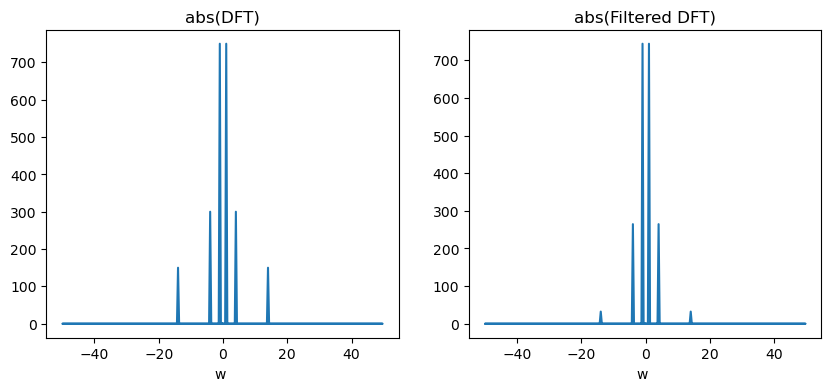

In [31]:
#plt.plot(np.fft.fftshift(fft_filt))
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(freq,np.abs(fft_f)) 
plt.xlabel("w ")
plt.title("abs(DFT)")
plt.subplot(1,2,2)
plt.plot(freq,np.abs(fft_filt))  
plt.xlabel("w ")
plt.title("abs(Filtered DFT)")

Text(0, 0.5, 'y')

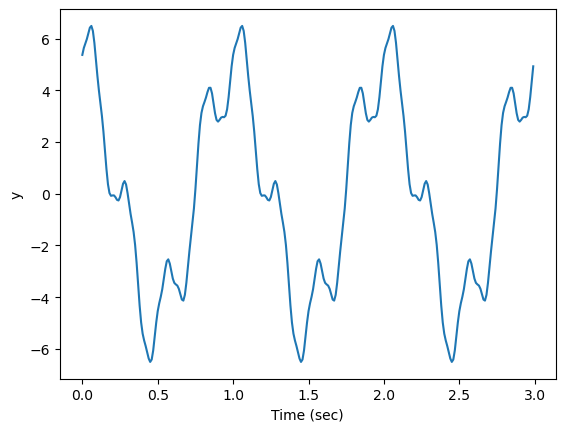

In [32]:
# inverse DFT
f_rec=np.fft.ifft(fft_filt)
#plt.plot(time, y_rec.real) # real part of inverse FFT
plt.plot(time,f_rec) #original signal
plt.xlabel("Time (sec)")
plt.ylabel("y")

We now filter the noisy signal

In [33]:
fft_gauss_n = np.multiply(fft_f_n,fft_gauss)

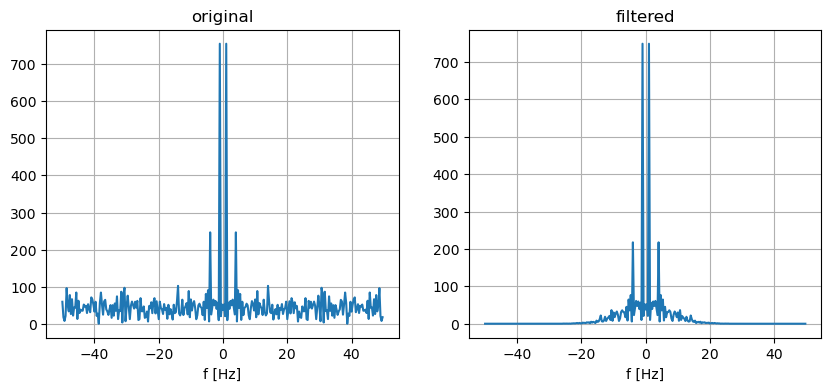

In [34]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
#notice all the shifts (to avoid artifacts)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_f_n))) 
plt.xlabel('f [Hz]')
plt.title('original')
plt.grid()
plt.subplot(1,2,2)
plt.plot(np.fft.ifftshift(freq),np.abs(np.fft.ifftshift(fft_gauss_n))) 
plt.xlabel('f [Hz]')
plt.title('filtered')
plt.grid()



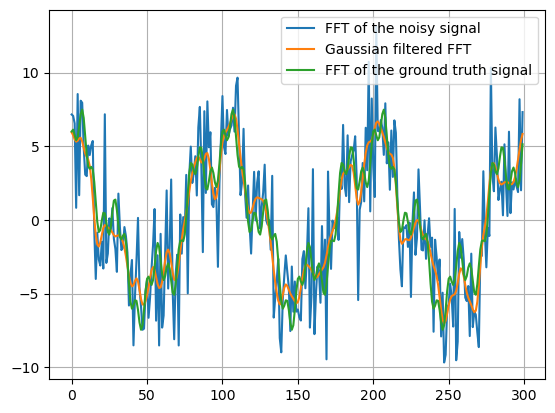

In [36]:

f2=np.fft.ifft(fft_f_n)
plt.plot(np.real(f2),label="FFT of the noisy signal")

f3=np.fft.ifft(fft_gauss_n)
plt.plot(np.real(f3),label="Gaussian filtered FFT")

plt.plot((f),label="FFT of the ground truth signal") #original noise-less
plt.legend(loc="upper right")
plt.grid()

## Butterworth filtering

## Wrapping up

- filtering in the frequencies: delete or attenuate values within ranges of frequency  
- ideal filters: hard cut-off (but ideal filters are difficult to implement without side effects, more on this in the next class)
- gaussian filters: smoother cut-off but better properties
- a compromise could be butterworth (higher orders?)
- in any case when we are low-pass filtering our signal we may loose high frequency useful information (we cannot selectively eliminate noise)